In [4]:
import pandas as pd
import gzip
from scipy.io import mmwrite
from scipy import sparse
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
dest = '/home/lguirardel/data/perturb_comp/toy/toy1/'
path = dest+'toy.processed'

In [6]:
d = 25
n = 12
N = 100
p=0.3

In [7]:
X_list = []
for i in range(n):
    c = np.random.normal(loc=np.zeros((d,)))
    c = c/np.linalg.norm(c)
    c = c + np.random.normal(np.zeros((N,d,)), scale=0.05)
    # c = (c*100).astype(int) # to integers
    # c[np.random.uniform(0,1,(N,d)) < p ] = 0 # sparsify
    X_list.append(c)
X = np.concatenate(X_list, axis=0)

In [8]:
X.shape

(1200, 25)

In [9]:
X[0]

array([ 0.38435115, -0.20357581,  0.20364161,  0.29885352,  0.05231012,
       -0.25665795, -0.06678789, -0.36873734, -0.06272708,  0.00418655,
        0.09508699,  0.05826679, -0.09582137,  0.04668069,  0.24613103,
       -0.14798793,  0.50052093, -0.11682728,  0.00814137,  0.0746177 ,
       -0.15638424,  0.10874178, -0.12989665, -0.27107981,  0.03065687])

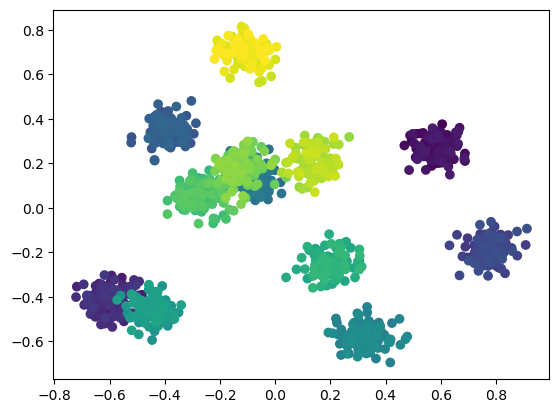

In [10]:
X_red = PCA(2).fit_transform(X)
plt.scatter(*X_red.T, c= [i for i in range(N) for j in range(n)])

In [11]:
# D = np.zeros((n,n))
# for i in range(n):
#     for j in range(n):
#         a1, a2 = X_list[i], X_list[j]
#         D[i,j] = ((a1[:,None,:] - a2[None, :, :])**2).sum()**(1/2)/N


In [12]:
# pd.DataFrame(D, index=range(n), columns=range(n))

We need fake matrix, genes, cells, variants2cell, cell metadata, and variants 

In [13]:
X = sparse.coo_matrix(X)

In [14]:
path

'/home/lguirardel/data/perturb_comp/toy/toy1/toy.processed'

In [15]:
# matrix
with gzip.open(path+'.matrix.mtx.gz', 'wb') as file:
    mmwrite(file, X)

In [16]:
# genes
with gzip.open(path+'.genes.csv.gz', 'wb') as file:
    for i in range(d):
        file.write(f'gene_{i}\n'.encode())

In [17]:
# cells
with gzip.open(path+'.cells.csv.gz', 'wb') as file:
    for i in range(N*n):
        file.write(f'cell_{i}\n'.encode())

In [18]:
# cell to variant
# there is a bunch of other info in there but we don't care
with gzip.open(dest+'/toy.variants2cell.csv.gz', 'wb') as file:
    file.write('cell\tvariant\n'.encode())
    for i in range(n):
        for j in range(N):
            file.write(f'cell_{i*N+j}\tvariant_{i}\n'.encode())

In [19]:
# variant to class
df = pd.DataFrame()
df['variant'] = [f'variant_{i}' for i in range(n)]
df['Variant functional class'] = [f'fc_{i}' for i in range(n)]
df = df.set_index('variant')
df.to_csv(path+'.variants.csv')


In [20]:
# cell metadata
phases = ['G0','G1.S','S','G2.M','M','M.G1']
with gzip.open(path+'.cells.metadata.csv.gz', 'wb') as file:
    file.write('phase.multi,cell\n'.encode())
    for i in range(N*n):
        file.write(f'{np.random.choice(phases)},cell_{i}\n'.encode())

# Time to test

In [21]:
%load_ext autoreload
%autoreload 1
%aimport main
%aimport data_utils

In [22]:
from main import *

In [23]:
paths = get_paths(dest)
paths

['/home/lguirardel/data/perturb_comp/toy/toy1/toy.processed.matrix.mtx.gz',
 '/home/lguirardel/data/perturb_comp/toy/toy1/toy.processed.genes.csv.gz',
 '/home/lguirardel/data/perturb_comp/toy/toy1/toy.processed.cells.csv.gz',
 '/home/lguirardel/data/perturb_comp/toy/toy1/toy.variants2cell.csv.gz',
 '/home/lguirardel/data/perturb_comp/toy/toy1/toy.processed.variants.csv',
 '/home/lguirardel/data/perturb_comp/toy/toy1/toy.processed.cells.metadata.csv.gz']

In [24]:
counts = load_data(*paths, group_wt_like=False)

	Reading files...
		Reading matrix
		Reading genes and cells
		Reading variant data
	Merging and processing...


		12 variant classes


In [25]:
counts

,gene_0,gene_1,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,...,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,cycle,variant,Variant functional class
cell,,,,,,,,,,,,,,,,,,,,,
cell_0,0.384351,-0.203576,0.095087,0.058267,-0.095821,0.046681,0.246131,-0.147988,0.500521,-0.116827,...,0.298854,0.052310,-0.256658,-0.066788,-0.368737,-0.062727,0.004187,S,variant_0,fc_0
cell_1,0.215992,-0.136177,0.144847,0.153030,-0.119629,0.033086,0.282177,-0.237687,0.450310,-0.101863,...,0.267656,-0.036654,-0.290355,-0.102270,-0.324796,-0.131568,-0.087170,M.G1,variant_0,fc_0
cell_10,0.287712,-0.101034,0.114237,0.069035,-0.067184,-0.017744,0.216940,-0.218221,0.422251,0.031751,...,0.269962,-0.027888,-0.172109,0.021340,-0.337797,-0.101530,-0.031772,S,variant_0,fc_0
cell_100,-0.147595,0.044239,0.268919,0.106672,0.103930,0.381204,-0.402388,0.240766,0.079098,-0.129659,...,-0.204212,0.080532,-0.045520,-0.056118,-0.059712,-0.181556,0.177548,M.G1,variant_1,fc_1
cell_1000,-0.219905,-0.073924,0.016304,0.330640,-0.023736,-0.097858,-0.045532,-0.037607,0.198252,0.318713,...,0.235142,0.104961,-0.243865,-0.155107,0.243030,-0.787649,0.155734,Uncycling,variant_10,fc_10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_995,0.292839,-0.102790,-0.021442,0.295759,-0.207691,0.208341,-0.397567,-0.132017,-0.153835,0.083353,...,0.074595,-0.010817,-0.122475,-0.243938,0.067464,0.049050,0.260206,M.G1,variant_9,fc_9
cell_996,0.221107,-0.162770,-0.004385,0.360432,-0.167804,0.159781,-0.389835,-0.114508,-0.279428,0.018249,...,0.251493,0.076017,-0.208418,-0.307634,-0.003755,0.031025,0.282078,Uncycling,variant_9,fc_9
cell_997,0.228878,-0.116387,0.010890,0.189944,-0.257081,0.088724,-0.283950,-0.136987,-0.178383,-0.014391,...,0.261304,-0.040168,-0.120668,-0.370746,-0.024529,0.032802,0.238842,M.G1,variant_9,fc_9


In [26]:
counts.shape

(1200, 28)